In [ ]:
# Ridge, Lasso, sklearn.metrics.mean_squared_error, 

### Урок 2. Домашняя работа

**Задание простого уровня** Загрузите данные из файла `data/non_linear.csv` (директорию `data` ищите в приложенных к этому уроку материалах) и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [1]:
# -- ВАШ КОД ТУТ

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data ** n for n in range(1, degree + 1)]).T

start_df = pd.read_csv('data/non_linear.csv')
degree = 8
X = generate_degrees(start_df['x_train'], degree)
Y = start_df['y_train']

In [2]:
model_ridge = Ridge(alpha = 0.8).fit(X, Y)
model_lasso = Lasso(alpha = 0.8).fit(X, Y)
y_pred_ridge = model_ridge.predict(X)
y_pred_lasso = model_lasso.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.335308493501593, tolerance: 0.0031912256832197063
  positive)


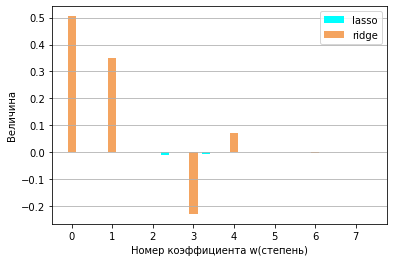

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.axes()
ax.yaxis.grid(True)
ax.set_xlabel('Номер коэффициента w(степень)')
ax.set_ylabel('Величина')
plt.bar([x+0.3 for x in range(len(model_lasso.coef_))], [y for y in model_lasso.coef_], width = 0.2, color = 'cyan', label = 'lasso')
plt.bar([x for x in range(len(model_ridge.coef_))], [y for y in model_ridge.coef_], width = 0.2, color = 'sandybrown', label = 'ridge')
plt.legend(loc='upper right')
plt.show()

In [4]:
model_lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -1.23662052e-02, -8.77130342e-03,
        9.34034433e-04,  1.71519415e-04,  3.88621101e-06, -1.73045762e-06])

In [5]:
model_ridge.coef_

array([ 5.05133950e-01,  3.50113358e-01, -1.03076840e-04, -2.30029370e-01,
        6.99603903e-02, -6.86910594e-04, -1.76964205e-03,  1.58301477e-04])

Коэффициенты в модели регрессии ridge больше по модулю, чем в lasso.

Пока что мы пользуемся моделями с регуляризацией как "черным ящиком" - знаем, как применять и это работает! Для успешного решения задач этого достаточно. Если вам, как и мне, интересно *почему* это работает - добро пожаловать во второй урок, где Вас ждёт больше кода и формул!